Result datas
n = 10: Average time = 0.00000160 seconds
n = 100: Average time = 0.00000205 seconds
n = 1000: Average time = 0.00000414 seconds
n = 10000: Average time = 0.00000507 seconds
n = 100000: Average time = 0.00000885 seconds
n = 1000000: Average time = 0.00001024 seconds


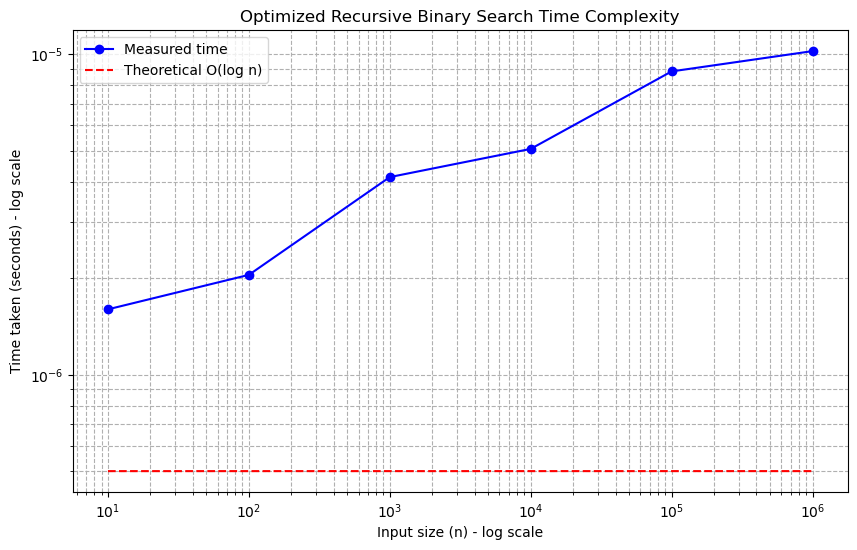

In [1]:
import time
import random
import matplotlib.pyplot as plt

def recursive_binary_search(arr, target, low, high):
    if high >= low:
        mid = (high + low) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] > target:
            return recursive_binary_search(arr, target, low, mid - 1)
        else:
            return recursive_binary_search(arr, target, mid + 1, high)
    else:
        return -1

def measure_search_time(arr, target):
    start_time = time.perf_counter()
    recursive_binary_search(arr, target, 0, len(arr) - 1)
    return time.perf_counter() - start_time

input_sizes = [10, 100, 1000, 10000, 100000, 1000000]  
repeats = 10  
test_cases = []


for n in input_sizes:
    arr = sorted(random.sample(range(1, n*10), n))
    targets = random.sample(arr, repeats)  
    test_cases.append((arr, targets))

average_times = []
print("Result datas")
for i, (arr, targets) in enumerate(test_cases):
    total_time = 0
    for target in targets:
        total_time += measure_search_time(arr, target)
    avg_time = total_time / repeats
    average_times.append(avg_time)
    print(f"n = {len(arr)}: Average time = {avg_time:.8f} seconds")


plt.figure(figsize=(10, 6))
plt.plot(input_sizes, average_times, 'bo-', label='Measured time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input size (n) - log scale')
plt.ylabel('Time taken (seconds) - log scale')
plt.title('Optimized Recursive Binary Search Time Complexity')
plt.grid(True, which="both", ls="--")


ref = [0.0000005 * (n**0.00001) for n in input_sizes]
plt.plot(input_sizes, ref, 'r--', label='Theoretical O(log n)')
plt.legend()
plt.show()